<a href="https://colab.research.google.com/github/alexapruiz/Projetos/blob/master/Aula_024_OpenCV_(continua%C3%A7%C3%A3o)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/eds.png" height="100px"></p>

# Aula 024 - OpenCV, Kernels e Filtros


**OpenCV** (Open Source Computer Vision Library) é uma biblioteca *open source* para **Visão Computacional** e **Machine Learning**. O OpenCV foi desenvolvido para facilitar uma innfraestrutura comum para aplicações de Visão Computacional e acelerar o uso de percepcão de máquinas em produtos comerciais.

Essa é uma biblioteca importantíssima para ter em seu arsenal, e é definitivamente um ***must*** se você quer se aprofundar em visão computacional.

<p align="center"><img src="https://miro.medium.com/max/3200/0*7s3HcYYvpnUhzDkG.png" width="60%"></p>

Com mais de 2500 algoritmos otimizados, essa biblioteca pode ser usada para detectar e reconhecer faces, identificar objetos, classificar ações humanas em vídeos, acompanhar objetos em movimento, extrair modelos 3D de objetos, acompanhar o movimento dos olhos, reconhecer cenários e estabelecer referências para serem preenchidas com realidade aumentada, entre muitas outras aplicações.

Empresas de todos os tamanhos utilizam OpenCV em sua stack, como Google, Yahoo, Microsoft, Intel, IBM, Sony, Honda, Toyota, além de startups como Applied Minds, VideoSurf, and Zeitera.


Nessa aula, vamos seguir nos aprofundando um pouco mais nessa biblioteca. Dessa vez, vamos trabalhar com Kernels e Filtros, que vão nos ajudar a manipular imagens através da biblioteca. 

Se você quiser ir mais a fundo, a [documentação oficial](https://docs.opencv.org/master/d3/dc1/tutorial_basic_linear_transform.html) é bastante completa, e ajuda a entender ainda melhor tudo que está acontecendo por trás das mudanças de contraste e brilho que vamos fazer a seguir.

In [ ]:
# importando os pacotes necessários
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Após importar os pacotes, vamos carregar nossas imagens e começar a manipulação delas.

In [ ]:
# importar imagens
img0 = cv2.imread("/content/carlos_0.png")
img1 = cv2.imread("/content/carlos_1.png")

Sempre importante visualizar a imagem e verificar que tudo foi carregado com sucesso.

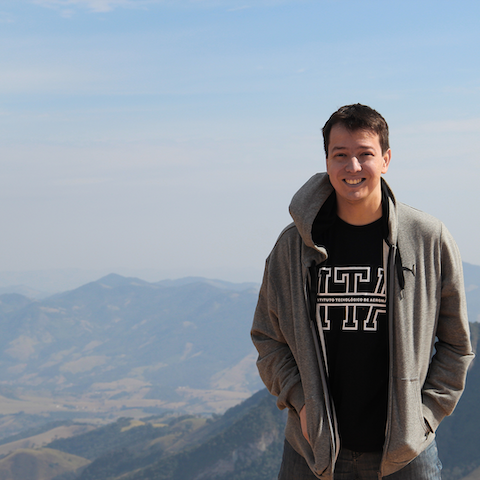

In [ ]:
# visualizando a imagem
cv2_imshow(img0)

## Filtros e Operações Aritméticas

O filtro na verdade é uma pequena matriz que usamos para deixar a imagem mais nítida ou borrada, por exemplo. Para fazer isso, precisamos fazer uma operação de convolução.

Vamos ver, na prática o que seria uma convolução, em termos simples. 

Por exemplo, temos uma matriz de 6x6 pixels que repesenta nossa imagem. O próximo passo é fazer uma operação de convolução com filtro 3x3. O produto final desse processo de convolução será uma matriz 4x4. Nós calculamos os elementos da matriz inicial (imagem) e pegamos o produto de cada elemento correspondente e os juntamos, como você pode ver abaixo.

<p align="center"><img src="http://media5.datahacker.rs/2018/10/multiplication_obojeno_new-1024x370.png" width="60%"></p>

<p align="center"><img src="https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif" width="30%"></p>

Após avaliar a e excpressão acima nós obtemos o resulto de -5. Esse será o valor do pixel naquela posição na nossa imagem com o filtro aplicado. Então, nós vamos movendo o filtro ao longo da imagem e vamos criando a imagem pronta.

Note que o nosso filtro é uma matriz com a mesma altura e largura (3×3, 5×5, 9×9). Sempre usamos números ímparespois precisamos ter um pixel ao centro dessa matriz.

Agora que temos uma intuição de como a matriz funciona, vamos ver ela em ação na prática.


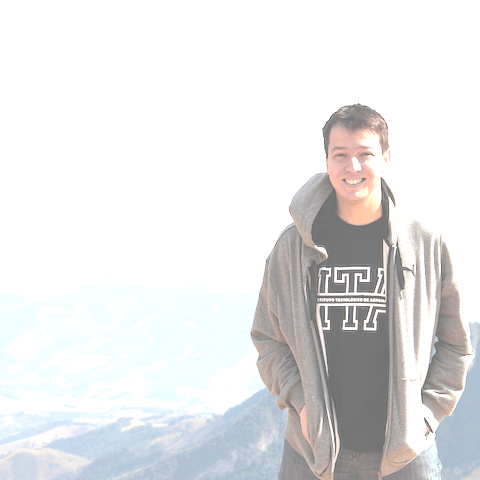

In [ ]:
# utilizando o ones do numpy para criar o filtro
filtro_1 = np.ones(img0.shape, dtype=np.uint8) * 110

# aplicando o filtro à imagem
somada = cv2.add(img0, filtro_1)

# mostrando a imagem com filtro
cv2_imshow(somada)

Esse primeiro filtro nos permitiu aumentar o brilho em toda a imagem, pois adicionamos o valor do filtro à nossa imagem original.

Para escurecer a imagem, vamos fazer a operação contrária, diminuindo os valor dos nossos pixels.

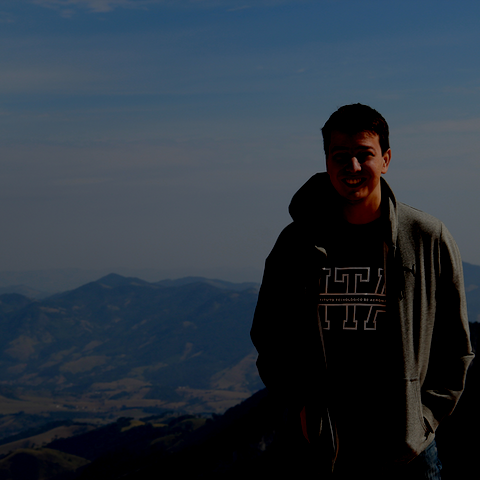

In [ ]:
# criando filtro
filtro_2 = np.ones(img0.shape, dtype=np.uint8) * 110

# aplicando filtro
subtraida = cv2.subtract(img0, filtro_1)

# imagem com filtro
cv2_imshow(subtraida)

### Blurring
Nas operações acima, nós estávamos tratando apenas de um canal, o que não é o mais comum quando lidamos com imagens, que normalmente estão no padrão **RGB** (Red, Blue, Green). Por isso, precisamos de outra forma de lidar com essas imagens.

Quando pensamos em canais como sendo uma "visão" da imagem como um todo, dando ênfase ou escondendo determinadas partes de acordo com as características de cada canal.


<p align="center"><img src="https://miro.medium.com/max/1000/1*k8P28Ayl-5hOqIMSv-qosw.jpeg" width="70%"></p>

Por isso, uma distinção de termos se faz chave aqui: quando falamos de 1 canal, os termos filtro e kernel são praticamente intercambiáveis, mas em geral, quando falamos de mais canais, eles são bem diferentes. 

Cada filtro, na verdade, é uma coleção de kernels, havendo um kernel para cada canal de input para a camada, e cada kernel sendo único. Cada filtro em uma camada convolucional produz um e apenas um canal de output, e eles o fazem assim:

<p align="center"><img src="https://miro.medium.com/max/1000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="70%"></p>

Cada um dos kernels do filtro "anda" por cima de seu respectivo canal de input, produzindo uma versão processada de cada um. É importante lembrar que alguns kernels podem ter pesos mais fortes que outros, o que resultaria em ênfases em determinados canais, ou um canal ser mais sensível a mudanças que outros.

<p align="center"><img src="https://miro.medium.com/max/1000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="70%"></p>

Então, cada uma das versões processadas por cada canal são somadas, formando um canal único. Os kernels de um filtro produzem uma versão para cada canal, e o filtro, como um todo, produz um canal como output.

<p align="center"><img src="https://miro.medium.com/max/294/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="30%"></p>

Por fim, temos um *bias*, ou um viés, peso. A forma que o *bias* funciona é que cada output de filtro possui um viés. Esse viés é adicionado ao canal obtido como output até agora e produz o output final do canal.

Portanto, quando falamos em qualquer número de filtros, a forma de trabalho será idêntica: Cada filtro processa o input por si só, juntamos diferentes conjuntos de kernels com um viés através do processo descrito acima, produzindo um canal de output único. Então, eles são concatenados para produzir um output geral final, com o número de canais sendo o número de filtros. Normalmente, também é aplicada uma não-linearidade passando esse input por outra camada de convolução, o que repete o processo.

Vamos ver como isso funciona na prática.


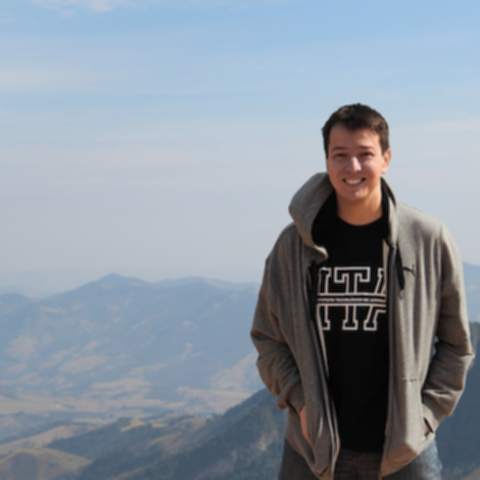

In [ ]:
# criando o kernel
kernel_blur = np.ones((3,3), np.float32) / 9

# aplicando o filtro
blurred = cv2.filter2D(img0, -1, kernel_blur)

# mostrando a imagem com filtro
cv2_imshow(blurred)

Aqui, podemos ver o resultado do filtro, que foi utilizado para embaçar a imagem.

Também podemos aumentar a "força" desse efeito, mudando o parâmetro pelo qual a matriz é dividida.

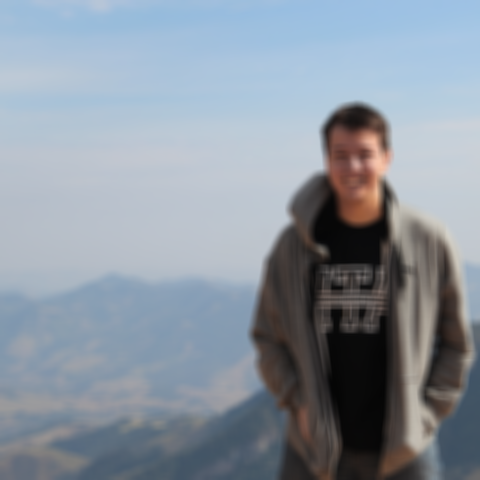

In [ ]:
# criando o kernel
kernel_blur = np.ones((9,9), np.float32) / 81

# aplicando o filtro
blurred = cv2.filter2D(img0, -1, kernel_blur)

# verificando o resultado
cv2_imshow(blurred)

Como podemos ver, a foto está bem mais embaçada com o nosso filtro mais forte.

### Gaussian Blur

Outra forma de aplicar um *blur*, um embaçado na nossa imagem, seria o ***Gaussian Blur***. Esse filtro é um pouco mais complexo, mas é o tipo de kernel mais usado para processamento de imagens.

Para a criação desse filtro nós usamos a **Função Gaussiana**. Essa função representa a probabilidade de eventos serem centrdos ao redor do valor da média. Além disso, o desvio padrão (𝜎) dessa função controla quão ampla será essa distribuição. Ao tirar amostras de valores dessa função, nós consguirmos coeficientes para uma matriz de filtragem Gaussiana. O efeito de diferentes desvios padrão podem ser observados nas imagens a seguir.

<p align="center"><img src="http://media5.datahacker.rs/2020/05/image5.png" width="50%" ></p>
<center> Imagem 2D</center>

<p align="center"><img src="http://media5.datahacker.rs/2020/04/OIWce-768x576.png" width="50%" ></p>
<center> Imagem 3D</center>

Agora que temos uma intuição no assunto, vamos ver como tudo isso fica na prática.



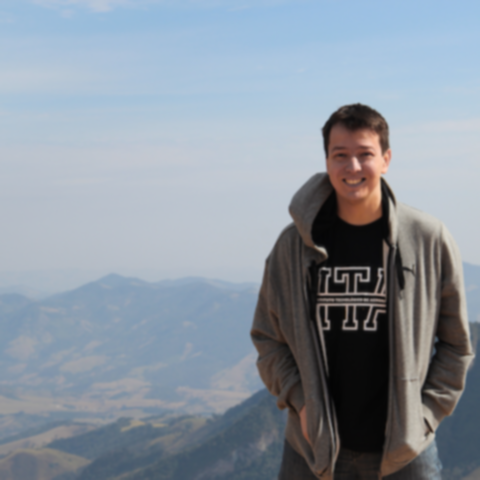

In [ ]:
# utilizando o GaussianBlur, que já é implementado no OpenCV
gaussian_blurred = cv2.GaussianBlur(img0, (5,5), 0)

# visualizando a imagem
cv2_imshow(gaussian_blurred)

Agora que sabemos o que acontece por trás, podemos usar sem medo essa implementação simples e direta que o OpenCV proporciona, sem muito trabalho, e com apenas uma linha de código.

### Motion Blur

Da mesma forma que implementamos o blur acima, também podemos implementar um outro tipo de embaçado, o *Motion Blur*.

Motion significa movimento, então esse embaçado vai buscar agir de forma a acrescentar um embaçado que passe a impressão de movimento na imagem.

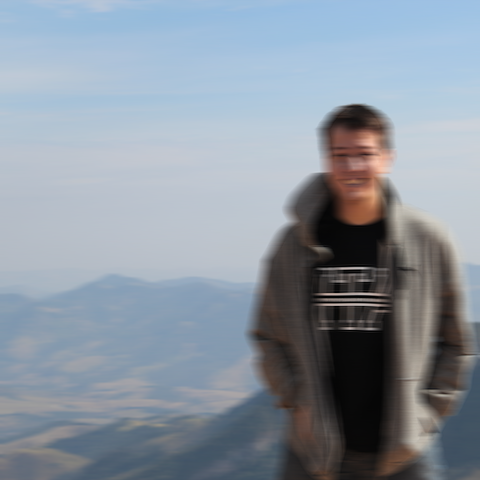

In [ ]:
# implementando o filtro
kernel_motion_blur = np.zeros((15, 15))
kernel_motion_blur[7, :] = np.ones(15)
kernel_motion_blur = kernel_motion_blur / 15

# aplicando o filtro
motion_blurred = cv2.filter2D(img0, -1, kernel_motion_blur)

# plotando a imagem
cv2_imshow(motion_blurred)

### Sharpening

O contrário de embaçar a foto, seria deixar ela mais bem definida, "afiar" a imagem. E esse é o conceito do *Sharpening*.

Nosso objetivo aqui é exatamente esse, melhorar a nitidez, deixar a imagem menos embaçada. Para isso, também podemos usar o OpenCV.

O processo de sharpening é usado, normalmente, para melhorar os "limites" dentro da imagem, os *edges*. Existem muitas formas de criar filtros para melhorar as bordas dentro da imagem, mas uma delas pode ser vista aqui embaixo:

<p align="center"><img src="http://media5.datahacker.rs/2020/04/25-279x300.jpg" width="30%" ></p>

Abaixo, podemos ver essa implementação em forma de código, onde criamos o array que representa esse filtro de sharpening. Esse filtro tem um centro positivo de 9 e todos os outros pontos possuem o valor -1. 

Para esse tipo de filtro, nós não temos uma implementação oficial do OpenCV. Por isso, vamos usar a função `cv2.filter2D()` que vai processar nossa imagem com um filtro criado por nós, arbitrariamente. Esse filtro é comumente usado para fazer sharpening em imagens coloridas.

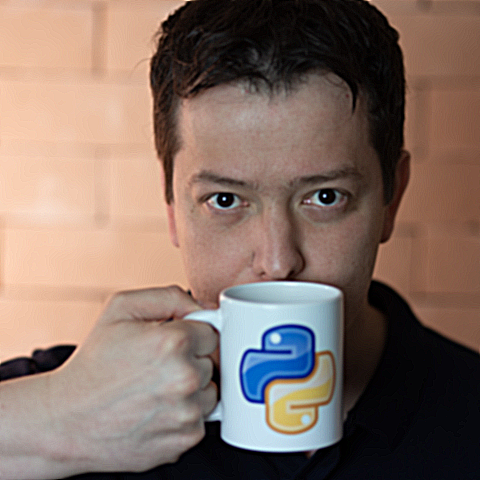

In [ ]:
# criando o filtro de sharpening
kernel_sharpening_1 = np.array([[-1,-1,-1],
                                [-1,9,-1],
                                [-1,-1,-1]])

# implementando o filtro 
sharpened = cv2.filter2D(img1, -1, kernel_sharpening_1)

# mostrando a imagem
cv2_imshow(sharpened)

### Canny Edges
Canny Edge Detection é um algortimo de detecção de bordas bastante popular, que tem implementação dentro do OpenCV.

O Canny Edges é um algoritmo multi-estágio, e esses estágios incluem:

* Redução de ruídos
* Busca pelo Gradiente de Intensidade da imagem
* Supressão de Não-Máximos
* Thresholding de Histerese

O OpenCV coloca todos os passos acima em uma única função: `cv2.Canny()`.

Para ver mais detalhes técnicos sobre essa função, recomandamos a leitura da [documentação oficial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html).

Abaixo, vamos ver ele em ação.

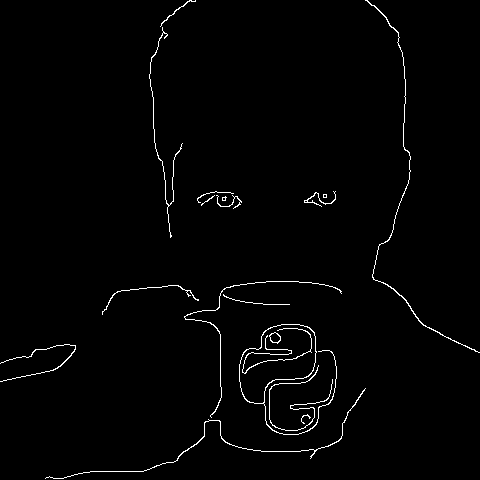

In [ ]:
# implementando Canny Edges
edges = cv2.Canny(img1, 50, 240)

# mostrando a imagem
cv2_imshow(edges)

Uma outra versão bastante popular de sharpening é o filtro [Laplacian](https://www.sciencedirect.com/topics/engineering/laplacian-filter). O Laplacian de uma imagem evidencia regiões de rápida intensidade e é um exemplo de uma segunda ordem, ou método de aprimoramento de derivação dupla (em ambas direções).

Esse método é particularmente bom em encontrar detalhes finos em uma imagem. Qualquer atributo com descontinuidade evidente vai ser ampliada pelo operador Laplacian.

<p align="center"><img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780128146873000028-f02-06-9780128146873.jpg?_" width="50%" ></p>


A implementação dele pode ser vista abaixo:

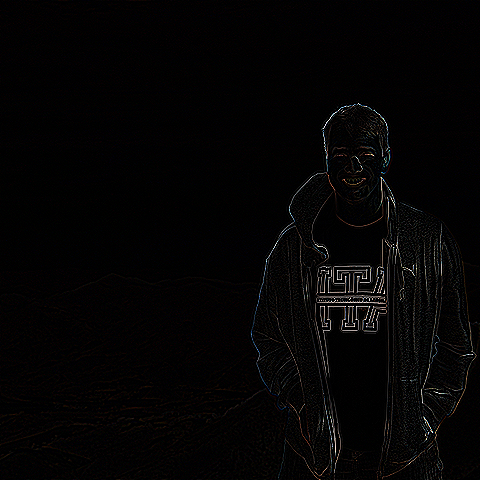

In [ ]:
# aplicando o filtro
laplacian = cv2.Laplacian(img0, cv2.CV_64F)

# dupla derivação em ambas direções
cv2_imshow(laplacian)

Na imagem plotada é fácil identificar o poder desse método para os detalhes. Ele consegue pegar com precisão detalhes da camiseta, dobras no casaco e até a fibra do mesmo.

Esse método pode ser extremamente útil em aplicações de identificação e acompanhamento de objetos, por exemplo.

### Filtros do Instagram

Agora que temos um amplo arsenal de ferramentas para manipular imagens com o OpenCV, já conseguimos entender como são feitos filtros prontos para imagens nas mais diversas plataformas, desde coisas mais simples como um filtro Sépia para o Instagram, até manipulações de imagens mais pesadas em programas como o Adobe Photoshop.

Abaixo, vamos ver como pode ser criado um filtro de Instagram usando OpenCV. O código original pode ser encontrado [aqui](http://datahacker.rs/004-how-to-smooth-and-sharpen-an-image-in-opencv/).

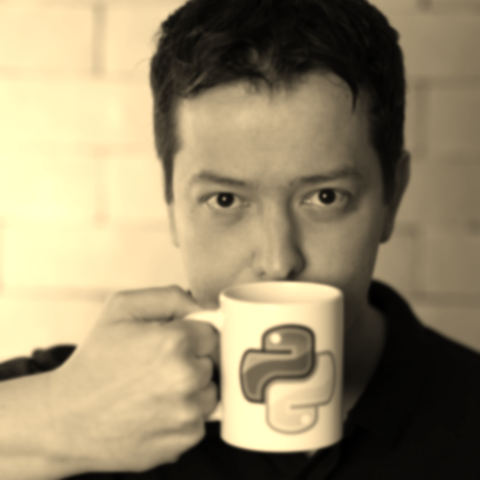

In [ ]:
# criando um filtro sépia 

(b,g,r)=cv2.split(img1)
r_new = r*0.393 + g*0.769 + b*0.189
g_new = r*0.349 + g*0.686 + b*0.168
b_new = r*0.272 + g*0.534 + b*0.131
sepia = cv2.merge([b_new, g_new, r_new])
cv2_imshow(sepia)